In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('figure', facecolor='w')
plt.rc('font', size=11)

In [2]:
RDF_BIN_WIDTH = 0.2
RDF_N_BINS = 50
S_BIN_WIDTH = 0.5
DENSITY = 0.033456

In [3]:
hist = np.array([np.loadtxt(f'data/asp181_wat_hist/{i+1}.dat') for i in range(60)])

In [4]:
def read_s(filename):
    return np.loadtxt(filename).T[0]

s = np.array([read_s(f'data/s_PTP1B//{i+1}.dat') for i in range(60)])

In [5]:
s_bins = np.int_(s // S_BIN_WIDTH)
s_min_bin = np.int_(np.min(s) // S_BIN_WIDTH)
s_max_bin = np.int_(np.max(s) // S_BIN_WIDTH)

In [6]:
def get_s_bin_hist(hist, s_bins, s_bin_id):
    return np.mean(hist[s_bins == s_bin_id], axis=0)

s_hist = np.array([get_s_bin_hist(hist, s_bins, s_bin_id)
                   for s_bin_id in range(s_min_bin, s_max_bin)])

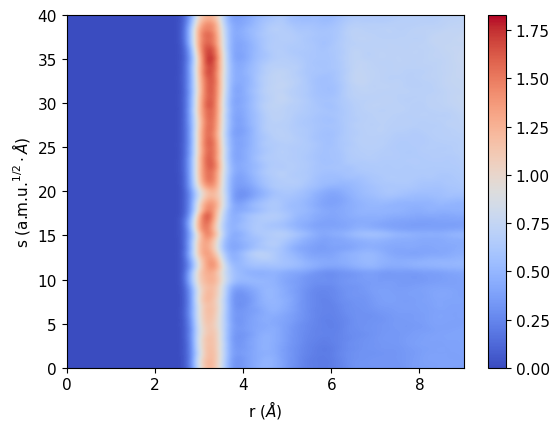

In [7]:
rdf_bin_edges = np.arange(RDF_N_BINS) * RDF_BIN_WIDTH
rdf_factors = (DENSITY * 4 / 3 * np.pi * 
               ((rdf_bin_edges + RDF_BIN_WIDTH) ** 3 - rdf_bin_edges ** 3))

rdf_bin_centers = rdf_bin_edges + RDF_BIN_WIDTH / 2

s_bin_edges = np.arange(s_min_bin, s_max_bin + 1) * S_BIN_WIDTH
s_bin_centers = s_bin_edges + S_BIN_WIDTH / 2


x = rdf_bin_centers[:-5]
y = s_bin_centers[:-1]
z = (s_hist / rdf_factors)[:-5,:-1]

extent = [x[0] - RDF_BIN_WIDTH, x[-1] + RDF_BIN_WIDTH,
          y[0] - S_BIN_WIDTH, y[-1] + S_BIN_WIDTH]

fig, ax = plt.subplots()
im = ax.imshow(z, cmap='coolwarm', aspect=0.2, origin='lower', 
               interpolation='bicubic', extent=extent)

ax.set_xlim([0,9])
ax.set_ylim([0,40])
ax.set_xlabel('r ($\AA$)')
ax.set_ylabel('s (a.m.u.$^{1/2}\cdot\AA$)')

cbar = ax.figure.colorbar(im, ax=ax, shrink=0.955)
plt.savefig('FigS3.png', dpi=300, bbox_inches='tight')
plt.show()